# Figure metric results
- This script is used to plot metric results of model performance.
- Simulations: GM_SLUCM, GM_CLMU. 


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import geopandas as gpd
home_path = '/gws/nopw/j04/duicv/yuansun/'

In [2]:
df_metric = pd.read_csv('data_for_figure/metrics.csv')
df_metric.head()

,Model,Variable,Station,MAE,MBE,RMSE,CORR,NSTD,SKEW,KURTOSIS,PSS,ABE_m5,ABE_m95
0,wrf,TAS,hadisd,1.130949,-0.229956,1.513669,0.969953,1.029710,0.171338,0.403602,0.534495,0.354195,0.902672
1,wrf-ctsm,TAS,hadisd,1.230251,-0.562309,1.576886,0.972624,1.055422,1.418611,0.609537,0.526243,0.514313,1.859245
2,wrf,RH,hadisd,8.867115,5.567587,11.823367,0.806687,1.031154,0.420391,20.486197,0.588930,3.210967,1.567181
3,wrf-ctsm,RH,hadisd,9.106611,6.306614,12.062595,0.815984,1.048847,0.164405,17.351917,0.625258,5.881169,5.451265
4,wrf,WIND,hadisd,1.867218,-1.601084,2.322733,0.727971,1.167446,0.673696,0.961227,0.677135,0.469510,1.801396


In [3]:
df_better = pd.read_csv('data_for_figure/better_metrics.csv')
df_better.head()

,variable,station,metric,better_model
0,TAS,hadisd,MAE,wrf
1,TAS,hadisd,MBE,wrf
2,TAS,hadisd,RMSE,wrf
3,TAS,hadisd,CORR,wrf-ctsm
4,TAS,hadisd,NSTD,wrf


In [4]:
model_list = ['wrf', 'wrf-ctsm']
station_list = ['hadisd', 'maqs', 'whitworth'] #, 'sensor'
var_list = ['TAS', 'RH', 'WIND']
nrow = len(var_list)
ncol = len(station_list)
metrics = ['MAE', 'MBE', 'RMSE', 'NSTD', 'CORR', 'ABE_m5', 'ABE_m95', 'SKEW', 'KURTOSIS', 'PSS']
metric_lables = ['MAE', 'MBE', 'RMSE', 'NSTD', 'R', '5th', '95th', 'SKEW', 'KURTOSIS', 'PSS']
matric_long_names = {'MAE': 'Mean absolute error', 'MBE': 'Mean absolute error', 'RMSE': 'Root mean square error', 
                     'NSTD': 'Normalized standard \n           deviation', 'CORR': 'Correlation coefficient', 
                     'ABE_m5': '5th percentile absolute bias error', 'ABE_m95': '95th percentile absolute bias error', 
                     'SKEW': 'Skewness', 'KURTOSIS': 'Kurtosis', 'PSS': 'Probability of smallest spread'}
labelsize = 6
tick_length = 2
linewidth = 0.5
ticklabel_pad = 0.1
boundarywidth = 0.2
labelcolor = '#6b6b6b'
cmap = mcolors.ListedColormap(['white', labelcolor])
alpha=0.5

In [5]:
crs = "EPSG:4326"
shapefile_path = home_path + 'dataset/Office_for_National_Statistics/county_boundary/Counties_and_Unitary_Authorities_December_2023_Boundaries_UK_BSC_4915494739307740134/CTYUA_DEC_2023_UK_BSC.shp'
gdf = gpd.read_file(shapefile_path)
gdf_platecarree = gdf.to_crs(crs)
greater_manchester_counties = ['Bolton', 'Bury', 'Manchester', 'Oldham', 'Rochdale','Salford', 'Stockport', 'Tameside', 'Trafford', 'Wigan']
gdf_greater_manchester = gdf_platecarree[gdf_platecarree['CTYUA23NM'].isin(greater_manchester_counties)]

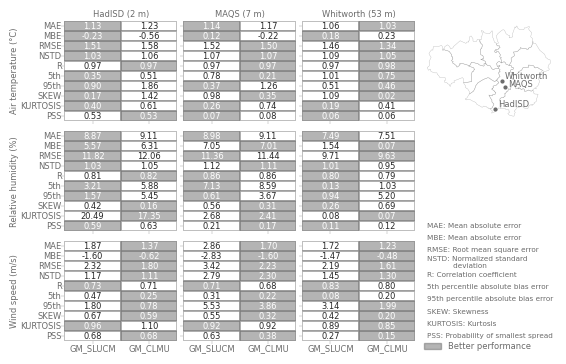

In [6]:
#fig, axes = plt.subplots(nrow, ncol, figsize=(5.5, 3.5))
#ax = axes.flatten()
fig = plt.figure(figsize=(5.5, 3.5))  # make width a bit larger
gs = gridspec.GridSpec(nrow, ncol + 1, width_ratios=[1]*ncol + [1.2])  # extra column for map

# Create normal subplots
ax = [fig.add_subplot(gs[i, j]) for i in range(nrow) for j in range(ncol)]
# Create map axis (rightmost column)
ax_map = fig.add_subplot(gs[0, -1])
gdf_greater_manchester.plot(ax=ax_map, color='none', edgecolor=labelcolor, linewidth=linewidth/2, alpha=0.5)
stations = {
    "HadISD": (-2.280893, 53.355540), #(-2.275, 53.354)
    "MAQS": (-2.21449, 53.44422),
    "Whitworth": (-2.23210, 53.46745),
    #"QuantAQ sensor": (-2.23, 53.48)
}
for name, (lon, lat) in stations.items():
    ax_map.plot(lon, lat, marker='o', color=labelcolor, markersize=2)
    if name == 'MAQS':
        offset_lat = 0
    else:
        offset_lat = 0.01    
    ax_map.text(lon + 0.02, lat + offset_lat, name, fontsize=labelsize, color=labelcolor)

for spine in ax_map.spines.values():
    spine.set_visible(False)
ax_map.set_xticks([])
ax_map.set_yticks([])
for i, var in enumerate(var_list):
    df_var_metric = df_metric[df_metric['Variable'] == var]
    for j, station in enumerate(station_list):
        if (var == 'WIND') & (station == 'sensor'):
            continue
        idx = i * ncol + j
        df_sel = df_better[(df_better['variable'] == var) & (df_better['station'] == station)]
        df_var_metric_station = df_var_metric[df_var_metric['Station'] == station]
        data_matrix = []
        metric_values = []
        for metric in metrics:
            row = []
            df_var_metric_station_metric = df_var_metric_station[['Model', metric]]
            for model in model_list:
                better = df_sel[df_sel['metric']==metric]['better_model'].values[0]

                if better == model:
                    row.append(1)  # color fill
                else:
                    row.append(0)  # no fill
                df_var_metric_station_metric_model = df_var_metric_station_metric[df_var_metric_station_metric['Model'] == model]
                metric_values.append(df_var_metric_station_metric_model[metric].values[0])    
            data_matrix.append(row)
        annot_matrix = np.array(metric_values).reshape(len(metrics), len(model_list))    
        sns.heatmap(data_matrix, ax=ax[idx], cmap=cmap, cbar=False, linewidths=0.25, alpha=alpha, annot=annot_matrix,  fmt=".2f", annot_kws={"size": labelsize},
                    linecolor='gray', square=False)
        if (i ==2) or (i==1 and j==3):
            bottom_label = True
        else:
            bottom_label = False        
        if j ==0:
            left_label = True
            ax[idx].set_ylabel(['Air temperature (°C)', 'Relative humidity (%)', 'Wind speed (m/s)'][i], fontsize=labelsize, color=labelcolor, labelpad=1)
        else:
            left_label = False
        if i ==0 and j <=3:
            ax[idx].set_title(['HadISD (2 m)', 'MAQS (7 m)', 'Whitworth (53 m)'][j], fontsize=labelsize, color=labelcolor, pad=3)    
        ax[idx].tick_params(axis='y', labelleft = left_label, labelsize=labelsize, length=tick_length, pad=ticklabel_pad, width=boundarywidth, colors=labelcolor)    
        ax[idx].tick_params(axis='x', labelbottom = bottom_label, labelsize=labelsize, length=tick_length, pad=ticklabel_pad, width=boundarywidth, colors=labelcolor)
        ax[idx].set_yticks(np.arange(10) +0.5)
        ax[idx].set_yticklabels(metric_lables, rotation=0)
        ax[idx].set_xticklabels(['GM_SLUCM', 'GM_CLMU'], ha='center')
better_patch = mpatches.Patch(color=labelcolor, label='Better performance', alpha=alpha)
legend = plt.legend(handles=[better_patch], fontsize=labelsize,
           bbox_to_anchor=(0, -2.35), loc='lower left', borderaxespad=0., frameon=False)
for i, text in enumerate(legend.get_texts()):
   text.set_color(labelcolor)
   
for m, metric in enumerate(metrics):
    if metric in ['ABE_m5', 'ABE_m95']:
        text_metric = matric_long_names[metric]
    else:
        text_metric = metric_lables[m] + ': ' + matric_long_names[metric]    
    fig.text(0.76, 0.38 - m*0.035, text_metric,
             fontsize=labelsize-0.75, color=labelcolor, ha='left', va='center')

plt.subplots_adjust(left=0.1, right=0.995, bottom=0.05, top=0.965, wspace=0.05, hspace= 0.1) 
fig.savefig('metric_summary.png', dpi=300)
fig.savefig('metric_summary.pdf', dpi=600)

In [42]:
metric

'PSS'